In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing pandas library
import pandas as pd
file_path = '/content/drive/MyDrive/processed_bitcoinforum.csv'
# Reading the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)
# Displaying the DataFrame
print(df)

        Post_ID              User     Type  \
0             1        adhitthana     Post   
1             1  jonald_fyookball  Comment   
2             3    CryptoMark2585     Post   
3             3           tuskacz  Comment   
4             3     Alphabay.Shop  Comment   
...         ...               ...      ...   
387159   387141            Kprawn  Comment   
387160   387161          tbch2325     Post   
387161   387161        gentlemand  Comment   
387162   387161          tbch2325  Comment   
387163   387161        gentlemand  Comment   

                                      Title  \
0       bitcoin fit within capitalism style   
1       bitcoin fit within capitalism style   
2                           bitcoin illegal   
3                           bitcoin illegal   
4                           bitcoin illegal   
...                                     ...   
387159          bitcoin tycoon xboxone game   
387160            lightning network segwitx   
387161            lightn

In [ ]:
# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d/%m/%y')

# Filter rows with timestamp after 2015
df.drop(df[df['Timestamp'].dt.year < 2015].index, inplace=True)

# Display the modified DataFrame
print(df)

        Post_ID               User     Type                      Title  \
2             3     CryptoMark2585     Post            bitcoin illegal   
3             3            tuskacz  Comment            bitcoin illegal   
4             3      Alphabay.Shop  Comment            bitcoin illegal   
5             3         usahaali03  Comment            bitcoin illegal   
6             3           crypto90  Comment            bitcoin illegal   
...         ...                ...      ...                        ...   
387138   387120  CryptonomyCapital  Comment               know aug aug   
387160   387161           tbch2325     Post  lightning network segwitx   
387161   387161         gentlemand  Comment  lightning network segwitx   
387162   387161           tbch2325  Comment  lightning network segwitx   
387163   387161         gentlemand  Comment  lightning network segwitx   

                                                  Content  Timestamp  \
2       know bitcoin legalbut country c

In [ ]:
# Print the lowest and highest timestamps
print("Lowest Timestamp:", df['Timestamp'].min())
print("Highest Timestamp:", df['Timestamp'].max())

Lowest Timestamp: 2015-01-01 00:00:00
Highest Timestamp: 2018-01-22 00:00:00


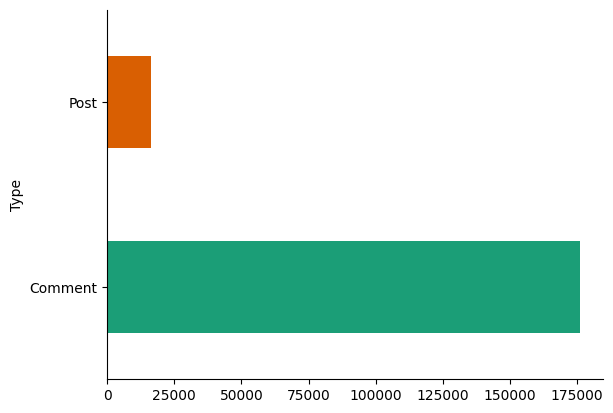

In [ ]:
# @title Type

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

# Add custom stopwords
custom_stop_words = {'mean', 'need', 'know', 'make', 'look', 'use', 'keep'}
stop_words.update(custom_stop_words)

# Convert the 'Content' column to string and then remove stopwords
df['Content'] = df['Content'].astype(str).apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to calculate sentiment score for each text
def calculate_sentiment_score(text):
    if isinstance(text, str):
        # Calculate the sentiment score
        sentiment_score = sid.polarity_scores(text)['compound']
        return sentiment_score
    else:
        return None

# Apply sentiment analysis to the 'Content' column
df['Sentiment'] = df['Content'].apply(calculate_sentiment_score)

# Print the DataFrame to verify that sentiment scores have been added
print(df[['Content', 'Sentiment']])

                                                  Content  Sentiment
2       bitcoin legalbut country call bit coin legalwh...     0.0000
3       bitcoin threat fiat currency politician lobby ...    -0.5106
4       countryes goubern bitcoin technology problem b...    -0.4019
5       forbid bitcoin operate ban bitcoin medium exch...    -0.7096
6       moment bitcoin totally legal otherwise pany ac...     0.7774
...                                                   ...        ...
387138              important side miner far miner segwit     0.2023
387160  wonder could clear whether lightning network u...     0.3400
387161  segwitx two part segwit soft fork first alread...    -0.5698
387162             okay thank lightning network hard fork     0.4588
387163  tbch pmokay thank lightning network hard fork ...     0.5574

[192274 rows x 2 columns]


In [ ]:
def categorize_sentiment(sentiment_score):
    if sentiment_score > 0.1:
        return 'Positive'
    elif sentiment_score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_Category'] = df['Sentiment'].apply(categorize_sentiment)

In [ ]:
print(df[['Content', 'Sentiment', 'Sentiment_Category']])

                                                  Content  Sentiment  \
2       bitcoin legalbut country call bit coin legalwh...     0.0000   
3       bitcoin threat fiat currency politician lobby ...    -0.5106   
4       countryes goubern bitcoin technology problem b...    -0.4019   
5       forbid bitcoin operate ban bitcoin medium exch...    -0.7096   
6       moment bitcoin totally legal otherwise pany ac...     0.7774   
...                                                   ...        ...   
387138              important side miner far miner segwit     0.2023   
387160  wonder could clear whether lightning network u...     0.3400   
387161  segwitx two part segwit soft fork first alread...    -0.5698   
387162             okay thank lightning network hard fork     0.4588   
387163  tbch pmokay thank lightning network hard fork ...     0.5574   

       Sentiment_Category  
2                 Neutral  
3                Negative  
4                Negative  
5                Negati

In [ ]:
# Drop rows with any null values
df.dropna(inplace=True)

In [ ]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 175201
Number of columns: 9


In [ ]:
sentiment_distribution = df['Sentiment_Category'].value_counts()
print(sentiment_distribution)

Sentiment_Category
Positive    103374
Negative     50168
Neutral      21659
Name: count, dtype: int64


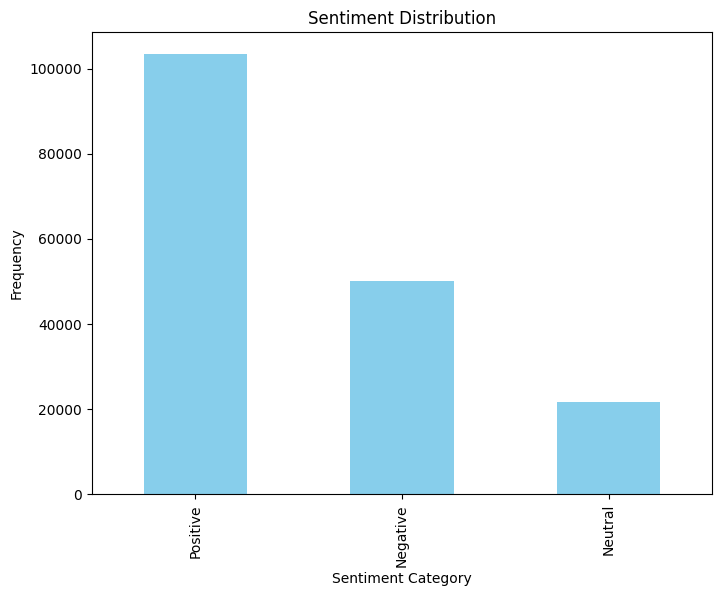

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.show()

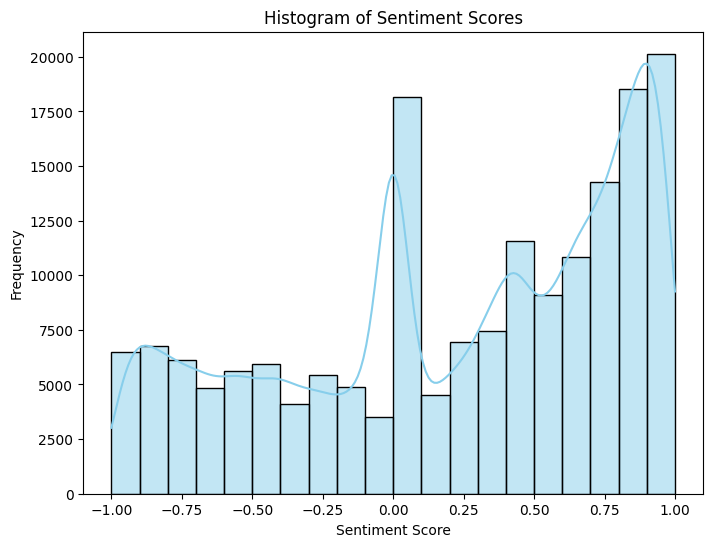

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Sentiment'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

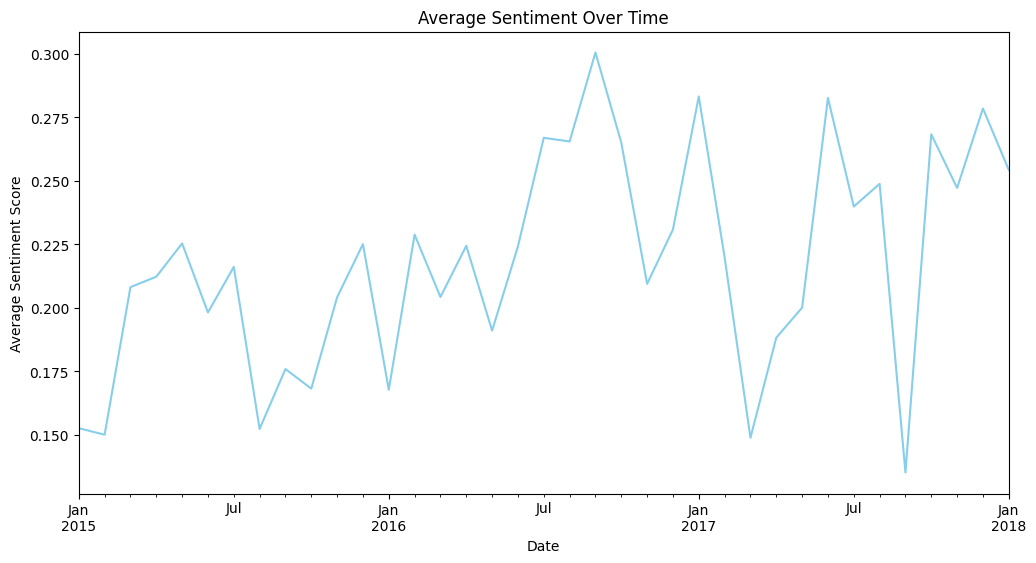

In [ ]:
plt.figure(figsize=(12, 6))
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
df['Sentiment'].resample('M').mean().plot(color='skyblue')
plt.title('Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.show()

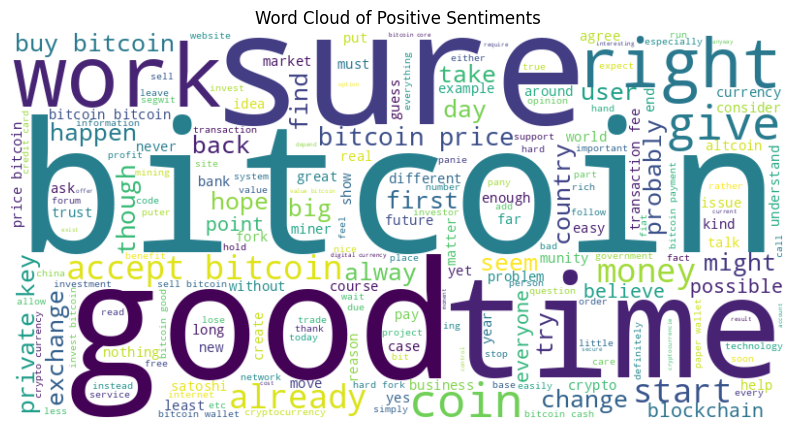

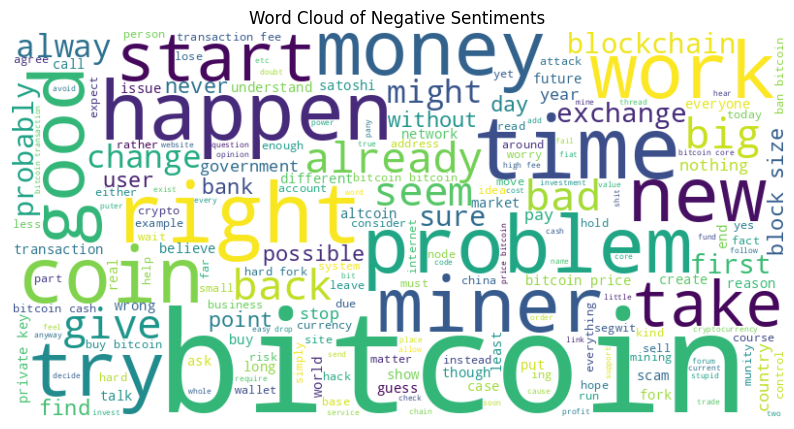

In [ ]:
from wordcloud import WordCloud

# Generate word cloud for positive sentiments
positive_text = ' '.join(df[df['Sentiment'] > 0]['Content'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud of Positive Sentiments')
plt.axis('off')
plt.show()

# Generate word cloud for negative sentiments
negative_text = ' '.join(df[df['Sentiment'] < 0]['Content'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud of Negative Sentiments')
plt.axis('off')
plt.show()

In [ ]:
df.head()

,Post_ID,User,Type,Title,Content,Parent_Post_ID,Sentiment,Sentiment_Category
Timestamp,,,,,,,,
2018-01-18,3,tuskacz,Comment,bitcoin illegal,bitcoin threat fiat currency politician lobby ...,3.0,-0.5106,Negative
2018-01-18,3,Alphabay.Shop,Comment,bitcoin illegal,countryes goubern bitcoin technology problem b...,3.0,-0.4019,Negative
2018-01-18,3,usahaali03,Comment,bitcoin illegal,forbid bitcoin operate ban bitcoin medium exch...,3.0,-0.7096,Negative
2018-01-18,3,crypto90,Comment,bitcoin illegal,moment bitcoin totally legal otherwise pany ac...,3.0,0.7774,Positive
2018-01-18,3,pitiflin,Comment,bitcoin illegal,sherlock everything approve government fyi chi...,3.0,-0.0258,Neutral


Getting Bitcoin Prices

In [ ]:
btc_df = pd.read_csv("/content/drive/MyDrive/price_bitcoin.tsv", sep='\t')

btc_df['Timestamp'] = pd.to_datetime(btc_df['date'])

# Merge the Bitcoin values with your DataFrame based on the "Timestamp" column
df = pd.merge(df, btc_df[['Timestamp', 'close']], left_index=True, right_on='Timestamp', how='left')

# Rename the 'Close' column from the Bitcoin values to 'btc_price'
df.rename(columns={'close': 'btc_price'}, inplace=True)

# Print the updated DataFrame
print(df.head())

    Post_ID           User     Type            Title  \
42        3        tuskacz  Comment  bitcoin illegal   
42        3  Alphabay.Shop  Comment  bitcoin illegal   
42        3     usahaali03  Comment  bitcoin illegal   
42        3       crypto90  Comment  bitcoin illegal   
42        3       pitiflin  Comment  bitcoin illegal   

                                              Content  Parent_Post_ID  \
42  bitcoin threat fiat currency politician lobby ...             3.0   
42  countryes goubern bitcoin technology problem b...             3.0   
42  forbid bitcoin operate ban bitcoin medium exch...             3.0   
42  moment bitcoin totally legal otherwise pany ac...             3.0   
42  sherlock everything approve government fyi chi...             3.0   

    Sentiment Sentiment_Category  Timestamp  btc_price  
42    -0.5106           Negative 2018-01-18    11474.9  
42    -0.4019           Negative 2018-01-18    11474.9  
42    -0.7096           Negative 2018-01-18    11474.

In [ ]:
df.head(30)

,Post_ID,User,Type,Title,Content,Parent_Post_ID,Sentiment,Sentiment_Category,Timestamp,btc_price
42,3,tuskacz,Comment,bitcoin illegal,bitcoin threat fiat currency politician lobby ...,3.0,-0.5106,Negative,2018-01-18,11474.90
42,3,Alphabay.Shop,Comment,bitcoin illegal,countryes goubern bitcoin technology problem b...,3.0,-0.4019,Negative,2018-01-18,11474.90
42,3,usahaali03,Comment,bitcoin illegal,forbid bitcoin operate ban bitcoin medium exch...,3.0,-0.7096,Negative,2018-01-18,11474.90
42,3,crypto90,Comment,bitcoin illegal,moment bitcoin totally legal otherwise pany ac...,3.0,0.7774,Positive,2018-01-18,11474.90
42,3,pitiflin,Comment,bitcoin illegal,sherlock everything approve government fyi chi...,3.0,-0.0258,Neutral,2018-01-18,11474.90
42,3,crustycrab666,Comment,bitcoin illegal,country legal japanese illegal russia depend c...,3.0,-0.9325,Negative,2018-01-18,11474.90
42,3,ralle14,Comment,bitcoin illegal,certain country ban bitcoin criminal activity ...,3.0,-0.6727,Negative,2018-01-18,11474.90
42,3,3gon,Comment,bitcoin illegal,cryptomark pma bitcoin legalbut country call b...,3.0,-0.2960,Negative,2018-01-18,11474.90
42,3,Rukawa2k,Comment,bitcoin illegal,bitcoin new innovation yet fully implement leg...,3.0,0.8874,Positive,2018-01-18,11474.90
42,3,judeafante,Comment,bitcoin illegal,cryptomark pma bitcoin legalbut country call b...,3.0,-0.5267,Negative,2018-01-18,11474.90


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head(6)

,Post_ID,User,Type,Title,Content,Parent_Post_ID,Sentiment,Sentiment_Category,Timestamp,btc_price
0,3,tuskacz,Comment,bitcoin illegal,bitcoin threat fiat currency politician lobby ...,3.0,-0.5106,Negative,2018-01-18,11474.9
1,3,Alphabay.Shop,Comment,bitcoin illegal,countryes goubern bitcoin technology problem b...,3.0,-0.4019,Negative,2018-01-18,11474.9
2,3,usahaali03,Comment,bitcoin illegal,forbid bitcoin operate ban bitcoin medium exch...,3.0,-0.7096,Negative,2018-01-18,11474.9
3,3,crypto90,Comment,bitcoin illegal,moment bitcoin totally legal otherwise pany ac...,3.0,0.7774,Positive,2018-01-18,11474.9
4,3,pitiflin,Comment,bitcoin illegal,sherlock everything approve government fyi chi...,3.0,-0.0258,Neutral,2018-01-18,11474.9
5,3,crustycrab666,Comment,bitcoin illegal,country legal japanese illegal russia depend c...,3.0,-0.9325,Negative,2018-01-18,11474.9


In [ ]:
nan_rows = df[df['btc_price'].isna()]
print("Rows with NaN btc_price:")
print(nan_rows.index)

Rows with NaN btc_price:
Index([], dtype='int64')


In [ ]:
correlation = df['Sentiment'].corr(df['btc_price'])
print("Correlation between Sentiment and btc_price:", correlation)

Correlation between Sentiment and btc_price: 0.04155102633178274


In [ ]:
# Spearman correlation
spearman_corr = df['Sentiment'].corr(df['btc_price'], method='spearman')

# Pearson correlation
pearson_corr = df['Sentiment'].corr(df['btc_price'], method='pearson')

print("Spearman correlation coefficient:", spearman_corr)
print("Pearson correlation coefficient:", pearson_corr)

Spearman correlation coefficient: 0.050071116229196286
Pearson correlation coefficient: 0.04155102633178274


In [ ]:
# Perform Granger causality test
max_lag = 5  # You can adjust the maximum lag as needed
granger_test_result = grangercausalitytests(df[['Sentiment', 'btc_price']], max_lag, verbose=True)

# Analyze the test results
for lag in range(1, max_lag + 1):
    print(f"Lag {lag}: F-statistic = {granger_test_result[lag][0]['ssr_ftest'][0]}, p-value = {granger_test_result[lag][0]['ssr_ftest'][1]}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=140.5888, p=0.0000  , df_denom=175197, df_num=1
ssr based chi2 test:   chi2=140.5912, p=0.0000  , df=1
likelihood ratio test: chi2=140.5348, p=0.0000  , df=1
parameter F test:         F=140.5888, p=0.0000  , df_denom=175197, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=50.5186 , p=0.0000  , df_denom=175194, df_num=2
ssr based chi2 test:   chi2=101.0401, p=0.0000  , df=2
likelihood ratio test: chi2=101.0110, p=0.0000  , df=2
parameter F test:         F=50.5186 , p=0.0000  , df_denom=175194, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=28.7245 , p=0.0000  , df_denom=175191, df_num=3
ssr based chi2 test:   chi2=86.1770 , p=0.0000  , df=3
likelihood ratio test: chi2=86.1558 , p=0.0000  , df=3
parameter F test:         F=28.7245 , p=0.0000  , df_denom=175191, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=20

In [ ]:
# Check unique values in the 'Sentiment' column
unique_sentiments = df['Sentiment'].unique()
print(unique_sentiments)


[-0.5106 -0.4019 -0.7096 ...  0.5872 -0.966  -0.5698]


In [ ]:
# Check data types of the 'btc_price' column
print(df['btc_price'].dtype)

# Check for missing values in the 'btc_price' column
missing_values_btc = df['btc_price'].isnull().sum()
print("Number of missing values in 'btc_price' column:", missing_values_btc)

float64
Number of missing values in 'btc_price' column: 0


In [ ]:
# Convert 'btc_price' column to numeric, coerce errors to NaN
df['btc_price'] = pd.to_numeric(df['btc_price'], errors='coerce')

# Check if there are any NaN values after conversion
missing_values_btc = df['btc_price'].isnull().sum()
print("Number of missing values in 'btc_price' column after conversion:", missing_values_btc)

Number of missing values in 'btc_price' column after conversion: 0


<Axes: >

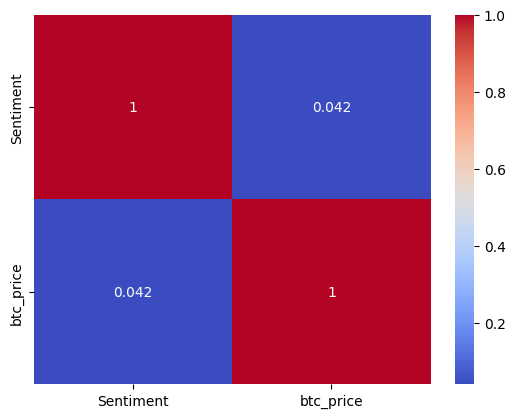

In [ ]:
import seaborn as sns

# Correlation Heatmap
correlation_matrix = df[['Sentiment', 'btc_price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')